## Word Cloud

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [34]:
import pandas as pd

df = pd.read_excel("Text Analysis.xlsx")
df.head()

,Saran,kategori
0,Layanan sudah baik.Waktu pengambilan sampel ju...,Tidak Ada Saran/Sudah baik
1,Bagian customer service dan penagihan harap un...,Responsible dan Pelayanan
2,Parameter yg belum terakreditasi..utk segera d...,Legalitas
3,marketing sering ganti-ganti kadang bingung mo...,Responsible dan Pelayanan
4,Smg lebih jaya,Tidak Ada Saran/Sudah baik


In [35]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white')

In [36]:
text = " ".join(Saran for Saran in df.Saran)

In [37]:
wordcloud.generate(text)

<function matplotlib.pyplot.show(close=None, block=None)>

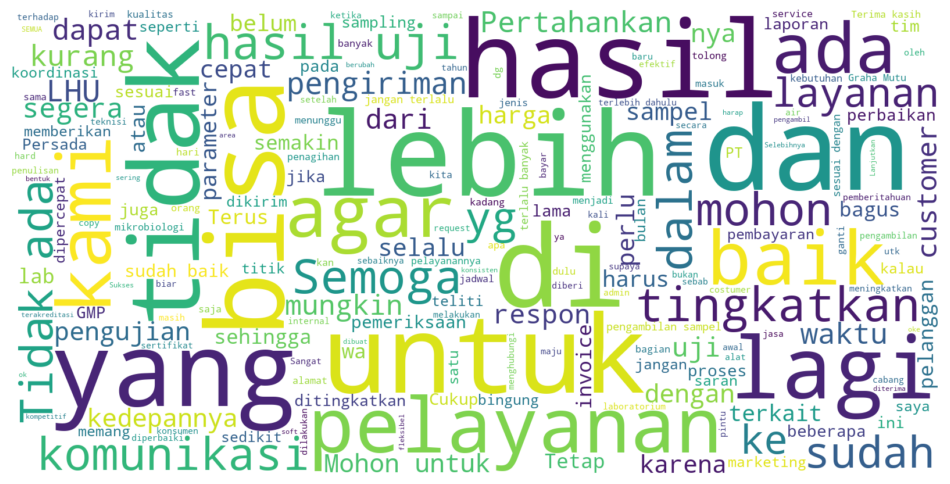

In [38]:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

## Sentiment Analysis

In [39]:
import string
import pandas as pd
import numpy as np

In [40]:
data = pd.read_excel("Text Analysis.xlsx")
data.head(10)

,Saran,kategori
0,Layanan sudah baik.Waktu pengambilan sampel ju...,Tidak Ada Saran/Sudah baik
1,Bagian customer service dan penagihan harap un...,Responsible dan Pelayanan
2,Parameter yg belum terakreditasi..utk segera d...,Legalitas
3,marketing sering ganti-ganti kadang bingung mo...,Responsible dan Pelayanan
4,Smg lebih jaya,Tidak Ada Saran/Sudah baik
5,Tidak ada,Tidak Ada Saran/Sudah baik
6,"Ada banyak CP yang harus dihibungi, mungkin bi...",Responsible dan Pelayanan
7,Sertifikat Hasil Uji sebaiknnya dlm bentuk sof...,Hasil Pengujian
8,"Kurang edukasi produk pelayanan ke customer,\n...",Responsible dan Pelayanan
9,Pemberitahuan pengiriman hard hasil,Pengiriman


### Cleaning Data

In [41]:
# proses case folding 
def casefolding(Saran):
    Saran = Saran.lower()
    return Saran
data['Saran'] = data['Saran'].apply(casefolding)
data.head(10)

,Saran,kategori
0,layanan sudah baik.waktu pengambilan sampel ju...,Tidak Ada Saran/Sudah baik
1,bagian customer service dan penagihan harap un...,Responsible dan Pelayanan
2,parameter yg belum terakreditasi..utk segera d...,Legalitas
3,marketing sering ganti-ganti kadang bingung mo...,Responsible dan Pelayanan
4,smg lebih jaya,Tidak Ada Saran/Sudah baik
5,tidak ada,Tidak Ada Saran/Sudah baik
6,"ada banyak cp yang harus dihibungi, mungkin bi...",Responsible dan Pelayanan
7,sertifikat hasil uji sebaiknnya dlm bentuk sof...,Hasil Pengujian
8,"kurang edukasi produk pelayanan ke customer,\n...",Responsible dan Pelayanan
9,pemberitahuan pengiriman hard hasil,Pengiriman


In [42]:
# proses cleansing remove regex (cleansing) seperti tanda baca dan angka angka
import re
import string
def cleansing(Saran):
    Saran = Saran.strip(" ")
    Saran = re.sub(r'[?|$|.|!_:")(-+,]', '', Saran)
    Saran = re.sub(r'\d+', '', Saran)
    Saran = re.sub(r"\b[a-zA-Z]\b", "", Saran)
    Saran = re.sub('\s+',' ', Saran)
    return Saran
data['Saran'] = data['Saran'].apply(cleansing)
data.head(10)


<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Toshiba\AppData\Local\Temp\ipykernel_13508\3385306792.py:9: SyntaxWarning: invalid escape sequence '\s'
  Saran = re.sub('\s+',' ', Saran)


,Saran,kategori
0,layanan sudah baikwaktu pengambilan sampel jug...,Tidak Ada Saran/Sudah baik
1,bagian customer service dan penagihan harap un...,Responsible dan Pelayanan
2,parameter yg belum terakreditasiutk segera dia...,Legalitas
3,marketing sering ganti-ganti kadang bingung mo...,Responsible dan Pelayanan
4,smg lebih jaya,Tidak Ada Saran/Sudah baik
5,tidak ada,Tidak Ada Saran/Sudah baik
6,ada banyak cp yang harus dihibungi mungkin bis...,Responsible dan Pelayanan
7,sertifikat hasil uji sebaiknnya dlm bentuk sof...,Hasil Pengujian
8,kurang edukasi produk pelayanan ke customer ha...,Responsible dan Pelayanan
9,pemberitahuan pengiriman hard hasil,Pengiriman


In [43]:
from nltk.tokenize import word_tokenize
#NLTK word tokenize
def word_tokenize_wrapper(text):
 return word_tokenize(text)
data['Saran'] = data['Saran'].apply(word_tokenize_wrapper)
data.head()

,Saran,kategori
0,"[layanan, sudah, baikwaktu, pengambilan, sampe...",Tidak Ada Saran/Sudah baik
1,"[bagian, customer, service, dan, penagihan, ha...",Responsible dan Pelayanan
2,"[parameter, yg, belum, terakreditasiutk, seger...",Legalitas
3,"[marketing, sering, ganti-ganti, kadang, bingu...",Responsible dan Pelayanan
4,"[smg, lebih, jaya]",Tidak Ada Saran/Sudah baik


In [44]:
# proses stemming
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(Saran):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in Saran:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    print(d_clean)
    return d_clean
data['Saran'] = data['Saran'].apply(stemming)

data.to_excel('TextAB.xlsx', index=False)
data_clean = pd.read_excel('TextAB.xlsx')
data_clean.head()

layan sudah baikwaktu ambil sampel juga bisa sesuai jadwal
bagi customer service dan tagih harap untuk lebih fast respond
parameter yg belum terakreditasiutk segera akreditasi
marketing sering ganti kadang bingung mo hubung siapa
smg lebih jaya
tidak ada
ada banyak cp yang harus dihibungi mungkin bisa buat pintu agar komunikasi tidak lewat
sertifikat hasil uji sebaiknnya dlm bentuk soft file
kurang edukasi produk layan ke customer harga kurang kompetitif respon admin kadang lama marketing kurang memaintenance customer bijak terima hasil kurang fleksibel bisa terima telah bayar lebih tim ambil sampel sudah oke komunikatif dan baik
pemberitahuan kirim hard hasil
sudah sesuai
lanjut
saya berharab kait bayar karena kami instansi milik perintah banyak proses yang harus lalu sehingga cara bayar memang sedikit butuh waktu yang agak lama mohon untuk lebih maklum
untuk tangan keluh dan butuh langgan mungkin bisa lebih sabar
layan sudah bagus tahan
tingkat baik beberapa mata uji biar akreditasi 

,Saran,kategori
0,layan sudah baikwaktu ambil sampel juga bisa s...,Tidak Ada Saran/Sudah baik
1,bagi customer service dan tagih harap untuk le...,Responsible dan Pelayanan
2,parameter yg belum terakreditasiutk segera akr...,Legalitas
3,marketing sering ganti kadang bingung mo hubun...,Responsible dan Pelayanan
4,smg lebih jaya,Tidak Ada Saran/Sudah baik


In [45]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import re

In [46]:
dt = pd.read_excel('TextAB.xlsx')
dt.head()

,Saran,kategori
0,layan sudah baikwaktu ambil sampel juga bisa s...,Tidak Ada Saran/Sudah baik
1,bagi customer service dan tagih harap untuk le...,Responsible dan Pelayanan
2,parameter yg belum terakreditasiutk segera akr...,Legalitas
3,marketing sering ganti kadang bingung mo hubun...,Responsible dan Pelayanan
4,smg lebih jaya,Tidak Ada Saran/Sudah baik


In [47]:
dt = dt.astype({'Saran' : 'string'})
dt = dt.astype({'kategori' : 'category'})
dt.dtypes

Saran       string[python]
kategori          category
dtype: object

In [66]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white')

In [67]:
text = " ".join(Saran for Saran in dt.Saran)

In [68]:
wordcloud.generate(text)

<function matplotlib.pyplot.show(close=None, block=None)>

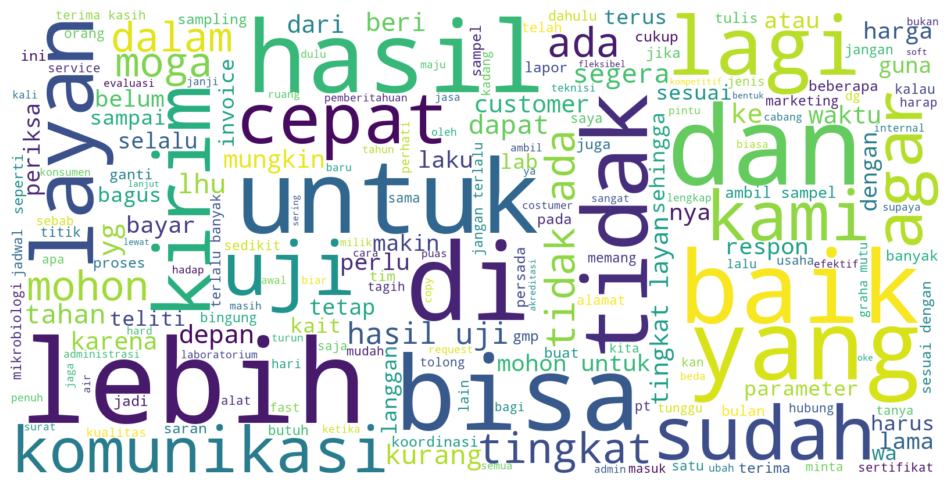

In [69]:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

### PROSES TF-IDF
teknik untuk mengukur pentingnya atau relevansi sebuah kata dalam sebuah dokumen

In [48]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dt['Saran'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(dt['Saran'].astype('U'))
print(text_tf)

  (0, 187)	0.3927029934247131
  (0, 440)	0.32006265458248956
  (0, 71)	0.23612700975349293
  (0, 206)	0.364784855133402
  (0, 407)	0.3134212644800531
  (0, 18)	0.3272822566516153
  (0, 42)	0.4687304589427897
  (0, 461)	0.27362960823527954
  (0, 277)	0.23365001741086328
  (1, 390)	0.41796990861705513
  (1, 139)	0.3501757377695931
  (1, 278)	0.18439095984912732
  (1, 524)	0.18927103293257158
  (1, 161)	0.3501757377695931
  (1, 468)	0.3501757377695931
  (1, 103)	0.19097197268019758
  (1, 439)	0.3666855981393067
  (1, 99)	0.30668680112965874
  (1, 38)	0.3501757377695931
  (2, 11)	0.46896153916070693
  (2, 422)	0.3527628252876374
  (2, 492)	0.5052234810610021
  (2, 57)	0.38124308281123176
  (2, 538)	0.33119499042842476
  (2, 348)	0.38124308281123176
  :	:
  (204, 323)	0.3125299783437438
  (204, 236)	0.3462616110861682
  (204, 243)	0.32726494067057366
  (204, 497)	0.27371633433504877
  (204, 61)	0.25471966391945433
  (204, 317)	0.23572299350385986
  (204, 427)	0.27371633433504877
  (204, 103

### PROSES COSINE SIMILARITY
metrik matematika yang digunakan untuk mengukur kesamaan antara dua vektor dalam ruang multidimensi

In [49]:
# Import cosine_similarity metrics
from sklearn.metrics.pairwise import cosine_similarity

In [50]:
# compute similarity using cosine similarity
cos_sim=cosine_similarity(text_tf, text_tf)

print(cos_sim)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.12912612 0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.20973675]
 [0.         0.12912612 0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.20973675 0.         1.        ]]


In [51]:
# splitting data 
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, dt['kategori'], test_size=0.2, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'Tidak Ada Saran/Sudah baik').sum()
neg = (y_test == 'Responsible dan Pelayanan').sum()
lg = (y_test == 'Legalitas').sum()
hp = (y_test == 'Hasil Pengujian').sum()
pg = (y_test == 'Pengiriman').sum()
pn = (y_test == 'Penagihan').sum()
hu = (y_test == 'Harga Uji dan Sampling').sum()
sm = (y_test == 'Sampling').sum()
postrain = (y_train == 'Tidak Ada Saran/Sudah baik').sum()
negtrain = (y_train == 'Responsible dan Pelayanan').sum()
lgtrain = (y_train == 'Legalitas').sum()
hptrain = (y_train == 'Hasil Pengujian').sum()
pgtrain = (y_train == 'Pengiriman').sum()
pntrain = (y_train == 'Penagihan').sum()
hutrain = (y_train == 'Harga Uji dan Sampling').sum()
smtrain = (y_train == 'Sampling').sum()
total = pos + neg + lg + hp + pg + pn + hu + sm
print("Jumlah data uji dengan Tidak Ada Saran/Sudah baik:", pos)
print("Jumlah data uji dengan Responsible dan Pelayanan:",neg)
print("Jumlah data uji dengan Legalitas:",lg)
print("Jumlah data uji dengan Hasil Pengujian:",hp)
print("Jumlah data uji dengan Pengiriman:",pg)
print("Jumlah data uji dengan Penagihan:",pn)
print("Jumlah data uji dengan Harga Uji dan Sampling:",hu)
print("Jumlah data uji dengan Sampling:",sm)
print("Jumlah data latih dengan Tidak Ada Saran/Sudah baik:", pos)
print("Jumlah data latih dengan Responsible dan Pelayanan:",neg)
print("Jumlah data latih dengan Legalitas:",lg)
print("Jumlah data latih dengan Hasil Pengujian:",hp)
print("Jumlah data latih dengan Pengiriman:",pg)
print("Jumlah data latih dengan Penagihan:",pn)
print("Jumlah data latih dengan Harga Uji dan Sampling:",hu)
print("Jumlah data latih dengan Sampling:",sm)
dt['kategori'].value_counts()

Jumlah Data Uji: (42, 208)
Jumlah Data Latih: (166, 208)
Jumlah data uji dengan Tidak Ada Saran/Sudah baik: 9
Jumlah data uji dengan Responsible dan Pelayanan: 20
Jumlah data uji dengan Legalitas: 1
Jumlah data uji dengan Hasil Pengujian: 6
Jumlah data uji dengan Pengiriman: 2
Jumlah data uji dengan Penagihan: 1
Jumlah data uji dengan Harga Uji dan Sampling: 2
Jumlah data uji dengan Sampling: 1
Jumlah data latih dengan Tidak Ada Saran/Sudah baik: 9
Jumlah data latih dengan Responsible dan Pelayanan: 20
Jumlah data latih dengan Legalitas: 1
Jumlah data latih dengan Hasil Pengujian: 6
Jumlah data latih dengan Pengiriman: 2
Jumlah data latih dengan Penagihan: 1
Jumlah data latih dengan Harga Uji dan Sampling: 2
Jumlah data latih dengan Sampling: 1


kategori
Tidak Ada Saran/Sudah baik    66
Responsible dan Pelayanan     65
Hasil Pengujian               28
Sampling                      17
Harga Uji dan Sampling         9
Legalitas                      8
Pengiriman                     8
Penagihan                      7
Name: count, dtype: int64

### Linear Support Vector Machine

In [52]:
dt['Saran'].apply(lambda x: len(x.split(' '))).sum()

2060

In [53]:
X = dt.Saran
y = dt.kategori
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
            ])

sgd.fit(X_train, y_train)

%time
y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names=None))

CPU times: total: 0 ns
Wall time: 0 ns
accuracy 0.6428571428571429
                            precision    recall  f1-score   support

    Harga Uji dan Sampling       1.00      0.50      0.67         2
           Hasil Pengujian       0.62      1.00      0.77         5
                 Legalitas       0.50      0.33      0.40         3
                 Penagihan       0.00      0.00      0.00         2
                Pengiriman       1.00      0.50      0.67         2
 Responsible dan Pelayanan       0.50      0.69      0.58        13
                  Sampling       1.00      0.33      0.50         3
Tidak Ada Saran/Sudah baik       0.82      0.75      0.78        12

                  accuracy                           0.64        42
                 macro avg       0.68      0.51      0.55        42
              weighted avg       0.67      0.64      0.62        42



C:\Users\Toshiba\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Toshiba\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Toshiba\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [55]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=None))

CPU times: total: 0 ns
Wall time: 0 ns
accuracy 0.5476190476190477
                            precision    recall  f1-score   support

    Harga Uji dan Sampling       1.00      0.50      0.67         2
           Hasil Pengujian       0.50      0.80      0.62         5
                 Legalitas       1.00      0.33      0.50         3
                 Penagihan       0.00      0.00      0.00         2
                Pengiriman       0.00      0.00      0.00         2
 Responsible dan Pelayanan       0.50      0.62      0.55        13
                  Sampling       0.00      0.00      0.00         3
Tidak Ada Saran/Sudah baik       0.56      0.75      0.64        12

                  accuracy                           0.55        42
                 macro avg       0.45      0.37      0.37        42
              weighted avg       0.49      0.55      0.50        42



C:\Users\Toshiba\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Toshiba\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Toshiba\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [65]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)

clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
Average CV Score:  0.9800000000000001
Number of CV Scores used in Average:  5
